# TAFE and DETE Exit Surveys 

In this project, we will clean and analyze the exit surveys from the employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The TAFE survey is available __[here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)__, and the DETE survey is available __[here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)__.

Our goal is to combine both surveys into one dataset and answer the following:
- Are experienced workers resigning due to job dissatsfaction more often than newer employees?
- Are older workers resigning due to job dissatisfaction more often younger employees?


## Summary
After analyzing the data, it appears that newer employees are less likely to resign due to job dissatisfaction than more experienced employees. However, age does not appear to play a significant factor in job dissatisfaction rates.

## Introduction
First, we will read and explore both datasets.

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding = "ISO-8859-1")

In [2]:
#Print number of rows and columns, as well as types and number of non-null objects for each row
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [4]:
#Ensure view is not truncated
pd.options.display.max_columns = 80

#Print first 10 rows of the DETE survey
dete_survey.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,SD,SD,SD,D,SD,D,D,A,NaN,SA,A,A,N,N,D,A,D,D,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,N,SD,D,A,A,D,D,SA,D,N,N,D,D,N,N,D,D,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,NaN,A,A,SA,SA,SA,SA,A,SA,SA,A,NaN,A,N,A,SA,A,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,D,N,D,D,N,SD,SD,D,D,N,A,NaN,SD,SD,N,D,SD,D,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,SD,SD,SD,A,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [5]:
#Print first 5 rows of TAFE survey
tafe_survey.head(10)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

After exploring both datasets, we can see that while there are many similarities between the two surveys, there is still some work to be done before they can be cleanly combined. 

There are a number of columns in both datasets that represent the same information but have different column names, such as the `SeperationType` column in the DETE survey and the `Reason for ceasing employment` column in the TAFE survey. The datasets will need to be cleaned so that columns representing the same information have the same name in both datasets.

In addition, we can see that the row in the DETE column with `ID = 10` has a `Not Stated` value for region. This indicates a null value, but was not registered as one when we read the survey. We will need to read the DETE survey in again and specify that a `Not Stated` value should register as a null value.

## Cleaning the Datasets
We will begin to clean the datasets based on the observations we made while exploring the datasets. We will begin by reading in the DETE survey with the `Not Stated` values correctly counted as null values. We will also drop the columns in each survey that are not relevant to our analysis.

In [6]:
#Read in the DETE survey while counting 'Not Stated' as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

#Drop irrelevant columns in both surveys
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

Next, we will clean the column names in both datasets. We want to eventually combine both datasets, so we will standardize the column names. Because the DETE columns are shorter and more succinct, we will use the DETE column names for the matching columns in the TAFE survey. First, we will clean the DETE column names.

In [7]:
#Remove whitespace, make all letters lowercase, and replace spaces with underscores in the DETE column names
dete_survey_updated.columns = (dete_survey_updated.columns.
                               str.strip().str.lower().
                               str.replace(" ", "_"))

#Show DETE column names
dete_survey_updated.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

Now that the DETE column names are cleaned, we can rename the corresponding TAFE columns.

In [8]:
#Map the existing TAFE column names to the desired names
column_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
               'Reason for ceasing employment': 'separationtype',
               'Gender. \xa0\xa0\xa0\xa0What is your Gender?': 'gender',
               'CurrentAge. \xa0\xa0\xa0\xa0Current Age': 'age', 
               'Employment Type. \xa0\xa0\xa0\xa0Employment Type': 'employment_status',
               'Classification. \xa0\xa0\xa0\xa0Classification': 'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
               }

#Update the TAFE column names
tafe_survey_updated = tafe_survey_updated.rename(column_names, axis = 1)

#Print the TAFE column names
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                     702 non-null int64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      437 non-null object
Contributing Factors. Career Move - Private Sector     437 non-null object
Contributing Factors. Career Move - Self-employment    437 non-null object
Contributing Factors. Ill Health                       437 non-null object
Contributing Factors. Maternity/Family                 437 non-null object
Contributing Factors. Dissatisfaction                  437 non-null object
Contributing Factors. Job Dissatisfaction              437 non-null ob

Recall that our goal is to analyze the job dissatisfaction among employees who have resigned. Let us look at the different values for `separationtype` for each survey.

In [9]:
#Print all the values and their frequencies in the specified column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [10]:
#Print all the values and their frequencies in the specified column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We can see that while the TAFE survey only has one value that indicates a resignation, the DETE survey has three. We are interested in any type of resignation, so we will combine the three resignation types into one value. The resignation types are the only values in the `separationtype` column that have a dash in their name, so we will split the names at the dash and only keep the beginning.

In [11]:
#Split the 'seperationtype' column values where there is a '-' and only keep the first part of the string
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

Now that we have cleaned the value names, we can create new dataframes that only contain the employees that resigned in each survey.

In [12]:
#Create a new dataframe from the DETE survey that only contains rows where the 'separationtype' is resignation
dete_resignations = (dete_survey_updated[dete_survey_updated
                                         ['separationtype']
                                         == 'Resignation']).copy()

In [13]:
#Create a new dataframe from the DETE survey that only contains rows where the 'separationtype' is resignation
tafe_resignations = (tafe_survey_updated[tafe_survey_updated
                                         ['separationtype']
                                         == 'Resignation']).copy()

In [14]:
#Print the first five rows of our newly created dataframe
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [15]:
#Print the first five rows of our newly created dataframe
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Now that we have successfully created our new dataframes, we will check our data to ensure that it does not contain any obvious inconsistencies. We will check all of the columns in each dataframe that contain dates to ensure the dates make sense. As we can see in the two tables above, the TAFE survey only contains one column with dates, while the DETE survey contains three. First, we will check the values of the `cease_date` column in the TAFE survey.

In [16]:
#Print the different years and their frequencies in the 'cease_date' column
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Looking at the data above, there are no obvious errors. The years, spanning from 2009 - 2013, make sense with the data that we have. There are no years that appear out of place; therefore, we will not make any changes to our data.

Now, we will check the columns in the DETE survey. We will begin with the `cease_date` column.

In [17]:
#Print the values and their frequencies of the 'cease_date' column
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

We can see that, in this data, the cease dates range from 2006 - 2014, unlike in the TAFE survey, where the cease dates range from 2009 - 2013. However, while the cease dates in the DETE survey have a larger range, they do not appear to indicate a discrepancy. 

While the other columns containing date values, `dete_start_date` and `role_start_date`, contain only years represented as float values, this column contains string values that also occasionally contain the month as well. We will need to clean these values so we can compare the `cease_date` column to the other columns. 

In [18]:
#Split the string values at the '/' and only keep the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

#Convert the values to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

#Print the values and their frequencies of the 'cease_date' column
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Now that the `cease_date` column has been cleaned, we will check the other two columns, `dete_start_date` and `role_start_date`, to ensure the years appear to be accurate.

In [19]:
#Print the years and their frequencies of the 'dete_start_date' column
dete_resignations["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [20]:
dete_resignations['role_start_date'].value_counts()

2012.0    37
2011.0    33
2010.0    27
2013.0    24
2007.0    24
2008.0    21
2009.0    18
2004.0    10
2005.0     9
2006.0     7
2002.0     7
2003.0     6
1999.0     6
1989.0     5
1997.0     5
1992.0     4
1998.0     4
1993.0     3
1996.0     3
1988.0     3
2001.0     2
1987.0     2
1976.0     2
1994.0     2
1980.0     1
2000.0     1
200.0      1
1991.0     1
1982.0     1
1990.0     1
1986.0     1
Name: role_start_date, dtype: int64

While the `dete_start_date` column does not contain any obvious inconsistencies, the `role_start_date` column contains one value, 200.0, that does not make sense as a year. While it is very possible that the value was intended to be 2000.0 instead of 200.0, we can not know for sure. Therefore, we will remove this value from our dataframe.

In [21]:
#Create a new dataframe with all rows where 'role_start_date' is not 200.0
dete_resignations_updated = (dete_resignations[dete_resignations['role_start_date'] != 200.0]).copy()

#Print the years and their frequencies of the 'role_start_date' column
dete_resignations_updated['role_start_date'].value_counts()

2012.0    37
2011.0    33
2010.0    27
2013.0    24
2007.0    24
2008.0    21
2009.0    18
2004.0    10
2005.0     9
2006.0     7
2002.0     7
2003.0     6
1999.0     6
1989.0     5
1997.0     5
1992.0     4
1998.0     4
1993.0     3
1996.0     3
1988.0     3
2001.0     2
1987.0     2
1994.0     2
1976.0     2
1991.0     1
1990.0     1
1982.0     1
2000.0     1
1980.0     1
1986.0     1
Name: role_start_date, dtype: int64

Now that we have cleaned all of our columns containing years and checked them for inconsistencies, we can begin working with them. Recall that we want to know if the length of time at the company appears to impact job dissatisfaction. The TAFE survey already has a column, `institute_service`, that indicates the length of time each employee spent at the company, but the DETE survey does not have a corresponding column. However, the DETE survey _does_ have two columns we can use to calculate the number of years each employee has been at the company: `dete_start_date` and `cease_date`. We will create a `institute_service` column for the DETE dataframe using these two columns.

In [22]:
#Create a new column, institute_service, by subtracting 'dete_start_date' from 'cease_date'
dete_resignations_updated['institute_service'] = (dete_resignations_updated['cease_date'] 
                                                  - dete_resignations_updated['dete_start_date'])

#Print the values and their frequencies in the 'institute_service' column
dete_resignations_updated['institute_service'].value_counts()

5.0     23
1.0     22
0.0     20
3.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
20.0     7
15.0     7
13.0     7
22.0     6
17.0     6
10.0     6
14.0     6
12.0     6
18.0     5
16.0     5
23.0     4
24.0     4
11.0     4
21.0     3
19.0     3
32.0     3
39.0     3
25.0     2
30.0     2
36.0     2
26.0     2
28.0     2
27.0     1
42.0     1
41.0     1
35.0     1
38.0     1
33.0     1
34.0     1
49.0     1
29.0     1
31.0     1
Name: institute_service, dtype: int64

We now have a column for the DETE survey that indicates the length of time that each employee spent at the company. After we combine both datasets, we will clean and categorize this column. For now, we will move on and focus on creating a column that indicates whether or not a employee was dissatisfied at their company. 

We will print the first five rows of each dataframe once again so we can determine which columns will help us determine our new column.

In [23]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [24]:
dete_resignations_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In the TAFE survey, the following columns indicate job dissatisfaction:
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`.

In the DETE survey, the following columns indicate job dissatisfaction:
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

We can see that the DETE survey has more columns that indicate job satisfaction. In addition, while the columns in the DETE survey contain `True` or `False` to indicate values, the TAFE survey uses `-` to indicate `False` and the reason to indicate `True`. We want one column in each survey that uses `True` or `False` to indicate job dissatisfaction. First, we will update the values in the TAFE survey to be `True`, `False`, or `NaN`.

In [25]:
tafe_resignations.reset_index()

#for every value in the column, assign  NaN if null, assign False if '-', and assign True to all other values
for i in range(len(tafe_resignations)):
    if pd.isnull(tafe_resignations.iloc[i, 10]):
         tafe_resignations.iloc[i, 10] = np.nan
    elif tafe_resignations.iloc[i, 10] == '-':
        tafe_resignations.iloc[i, 10] = False
    else:
        tafe_resignations.iloc[i, 10] = True


        
#for every value in the column, assign  NaN if null, assign False if '-', and assign True to all other values
for i in range(len(tafe_resignations)):
    if pd.isnull(tafe_resignations.iloc[i, 11]):
         tafe_resignations.iloc[i, 11] = np.nan
    elif tafe_resignations.iloc[i, 11] == '-':
        tafe_resignations.iloc[i, 11] = False
    else:
        tafe_resignations.iloc[i, 11] = True
        

Now, we will create a new column, `dissatisfied`, in each dataframe and assign `True` if any of the columns that indicate job dissatisfaction are `True`, and assign `False` otherwise.

In [26]:
#Create a new column, dissatisfied, and assign True is any of the columns listed are True (otherwise False)
dete_resignations_updated['dissatisfied'] = (dete_resignations_updated[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                                        'physical_work_environment', 'lack_of_recognition',
                                                        'lack_of_job_security', 'work_location', 'employment_conditions',
                                                        'work_life_balance', 'workload']]).any(1, skipna = False)

#Print the values and their frequencies of the dissatisfied column
dete_resignations_updated['dissatisfied'].value_counts()

False    161
True     149
Name: dissatisfied, dtype: int64

In [27]:
#Create a new column, dissatisfied, and assign True is any of the columns listed are True (otherwise False)
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                        'Contributing Factors. Job Dissatisfaction']]).any(1, skipna = False)

#Print the values and their frequencies of the dissatisfied column
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

Now, we are almost ready to combine our datasets. First, however, we will create a column, `institute` that will record whether each row is from the DETE or the TAFE survey.

In [28]:
#Create a new column in each dataframe that indicates the corresponding institute
tafe_resignations['institute'] = 'TAFE'
dete_resignations_updated['institute'] = 'DETE'

We are now ready to combine our datasets together. After combining them, we will drop any columns with a large number of null values and reset the index.

In [29]:
#Combine the two datasets
combined = pd.concat([tafe_resignations, dete_resignations_updated], sort = False)

#Remove columns that have a large number of null values
combined_updated = combined.dropna(axis = 1, thresh = 500)

#Reset the index of our dataframe
combined_updated.reset_index(inplace = True)

#Print the first 5 rows of our new dataframe
combined_updated.head()

,index,id,cease_date,separationtype,gender,age,employment_status,position,institute_service,dissatisfied,institute
0,3,634139903350000000,2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,False,TAFE
1,4,634146578511788000,2010.0,Resignation,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE
2,5,634147506906311000,2010.0,Resignation,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,False,TAFE
3,6,634152007975694000,2010.0,Resignation,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,False,TAFE
4,7,634153745310374000,2010.0,Resignation,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE


Now that we have combined our datasets, we will clean the `institute_service` column. First, we will look at a frequency table of its values.

In [30]:
#Print the values and their frequencies in the institute_service column
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   7
15.0                   7
20.0                   7
10.0                   6
12.0                   6
17.0                   6
22.0                   6
14.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


We can see that some rows had an interval and others had a specific year. We will clean this column so every value is an interval. The intervals that already exist are : `Less than 1 year`, `1-2`, `3-4`, `5-6`, `7-10`, `11-20`, and `More than 20 years`. Our numerical values range from `0.0` to `49.0`. We will sort our values into four categories based on __[this](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage)__ *Buisness Wire* article about career stages. Due to the intervals we already have, we will have to make some minor adjustments to the definition of each stage.
- `Newbie` : < 3 years
- `Sophomore` : 3 - 6 years
- `Tenured` : 7-10 years
- `Sage` : > 10 

Every value in the `institute_service` column will fall cleanly within one of these categories. However, in order to sort our values we will need to clean them first. We will remove any non-digit characters from our values, and we will only keep the first number in each of the intervals. Doing so will not affect the category in which each of these values fall. 

In [49]:
#Import regex library
import re

#Create a dictionary to store the cleaned years
clean_years = {}

#Create a loop and set the value to the corresponding row in the institute service column
for i in range(len(combined_updated)):
    v = combined_updated.loc[i, 'institute_service']
    #If the value is null, set the corresponding value in the dictionary to NaN
    if pd.isnull(v):
         clean_years[i] = np.nan
    else:
        #Set the value to a string, replace the unwanted characters with blank spaces, and convert the value back to float
        v = str(v)
        v = re.sub(r'-\d+|\.\d+', '', v)
        v = re.sub(r'\D', '', v)
        v = float(v)
        clean_years[i] = v

Now that we have successfully cleaned our values, we will create a new column, `service_cat`, and sort each value accordingly.

In [50]:
#Check every value in our dataframe and label it accordingly
for i in range(len(combined_updated)):
    v = clean_years[i]
    if pd.isnull(v):
         combined_updated.loc[i, 'service_cat'] = np.nan
    elif v >= 10:
        combined_updated.loc[i, 'service_cat'] = 'Sage'
    elif v >= 7:
        combined_updated.loc[i, 'service_cat'] = 'Tenured'
    elif v >= 3:
        combined_updated.loc[i, 'service_cat'] = 'Sophomore'
    else:
        combined_updated.loc[i, 'service_cat'] = 'Newbie'      

In [33]:
#Print the values and their frequencies of the service_cat column
combined_updated['service_cat'].value_counts(dropna = False)

Newbie       193
Sophomore    172
Sage         141
NaN           88
Tenured       56
Name: service_cat, dtype: int64

Now that we have successfully created our `service_cat` column, we can move on to clean the age column. First, we will look at the values in the column.

In [34]:
#Print the frequencies of each value in the `age` column
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45          45
36-40            41
46-50            41
46  50          39
26-30            35
21  25          33
26  30          32
36  40          32
31  35          32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We can see that all of the ages are represented by intervals rather than integers. We can also see that while one of our original surveys used `-` in between the values of the intervals, another survey used `  `. In addition, while both surveys used `20 or younger` to categorize their youngest employees, the surveys did not use the same values to categorize their oldest employees. One survey used `56 or older` for their oldest employees, and the other had `61 or older` as their oldest category. We will need to use the `56 or older` category for our oldest employees in our combined survey in order to accurately represent their age. We will keep the intervals the same, but we will clean the data so all of the intervals contain `-` between the values. 

In [35]:
age = {}
#Create a loop and set the value to the corresponding row in the age column
for i in range(len(combined_updated)):
    v = combined_updated.loc[i, 'age']
    #If the value is null, set the corresponding value in the new column to NaN
    if pd.isnull(v):
         age[i] = np.nan
    else:
        #Set the value to a string, replace the unwanted characters with blank spaces, and convert the value back to float
        v = re.sub(' \ ', '-', v)
        age[i] = v

In [36]:
#Create an empty column for 'age_int'
combined_updated.loc[:, "age_int"] = ''

#Check every value in our dataframe and label it accordingly
for i in range(len(combined_updated)):
    v = age[i]
    if pd.isnull(v):
         combined_updated.loc[i, 'age_int'] = np.nan
    elif v == '56 or older' or v == '56-60' or v == '61 or older':
        combined_updated.loc[i, 'age_int'] = '56 or older'
    else:
        combined_updated.loc[i, 'age_int'] = v
        
combined_updated['age_int'].value_counts()


41-45            93
46-50            80
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
20 or younger    10
Name: age_int, dtype: int64

In [37]:
combined_updated.head()

,index,id,cease_date,separationtype,gender,age,employment_status,position,institute_service,dissatisfied,institute,service_cat,age_int
0,3,634139903350000000,2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
1,4,634146578511788000,2010.0,Resignation,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE,Sophomore,41-45
2,5,634147506906311000,2010.0,Resignation,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,False,TAFE,Tenured,56 or older
3,6,634152007975694000,2010.0,Resignation,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,False,TAFE,Sophomore,20 or younger
4,7,634153745310374000,2010.0,Resignation,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE,Sophomore,46-50


Now that our dataset is cleaned, we can move on to analysis.

## Analysis
Recall that one of our goals is to determine whether it appeared the length of time an employee spent at their company had an effect on their job dissatisfaction. First, we will take a look at the values in the `dissatisfied` column.

In [38]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    402
True     240
NaN        8
Name: dissatisfied, dtype: int64

We can see that `False` is the most popular value, meaning that the employee was not dissatisfied with their job. We also have 8 null values. We will fill our null values with our most popular value so we can perform our analysis.

In [39]:
#Fill null values in the 'dissatisfied' column with False
combined_updated.loc[:,'dissatisfied'] = combined_updated.loc[:,'dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna = False)

False    410
True     240
Name: dissatisfied, dtype: int64

In [56]:
dissatisfied_service = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')
dissatisfied_service

,dissatisfied
service_cat,
Newbie,0.295337
Sage,0.475177
Sophomore,0.343023
Tenured,0.553571


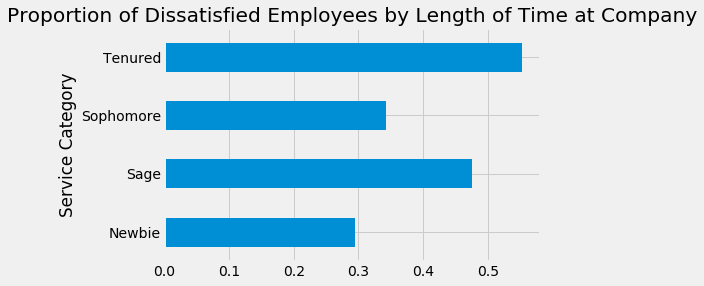

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

ax = dissatisfied_service.plot.barh(legend = False)
ax.set_title('Proportion of Dissatisfied Employees by Length of Time at Company')
ax.set_ylabel('Service Category')

plt.show()

As we can see in the graph above, two categories that reported the highest job dissatisfaction, `Sage` and `Tenured`, are also the two categories that represent longer periods of time at the company. 

In [52]:
dissatisfied_age = pd.pivot_table(combined_updated, values='dissatisfied', index='age_int')
dissatisfied_age

,dissatisfied
age_int,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.387500
51-55,0.422535
56 or older,0.423077


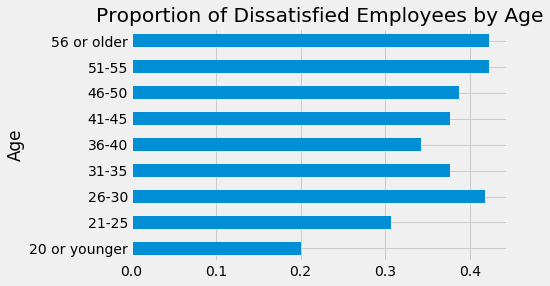

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

ax = dissatisfied_age.plot.barh(legend = False)
ax.set_title('Proportion of Dissatisfied Employees by Age')

ax.set_ylabel('Age')

plt.show()

There does not appear to be a very strong relationship between age and job dissatisfaction. While the youngest employees did report lower job dissatisfaction than the oldest employees, there is also a large number of employees in the `26-30` age range that reported job dissatisfaction. Overall, we can conclude that age does not appear to have a large effect on job dissatisfaction.